**Linear Regression**

Link for the dataset: https://www.kaggle.com/datasets/kianindeed/imdb-movie-dataset-dec-2023

This dataset contains top IMDB movies updated till 15 Dec 2023. This file in the csv fromat and it contains 11 columns namely: Moive Name, Rating, Votes, Meta Score, Genre, PG Rating, Year, Duration, Cast, Director. The data has 1950 rows

**Cleaning and modifying data**

In [2]:
# install all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# uploading dataset to juputer notebook
df = pd.read_csv("imdb_movie_data_2023.csv")

In [4]:
# read the data and see how I can modify this dataset
df.head()

# I have to google some names of columns to better understand what they mean
# Metascore is considered the rating of a film. Scores are assigned 
# to movie's reviews of large group of the world's most respected critics, 
# and weighted average are applied to summarize their opinions range.
# https://www.imdb.com/list/ls051211184/#:~:text=Metascore%20is%20considered%20the%20rating,to%20summarize%20their%20opinions%20range.

# PG rating means to what audience these movies
# if there is any restrictions for audience

,Unnamed: 0,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


In [5]:
# check the format of columns
df.dtypes

# I need to check and if it is possible to modify the next columns:
# Genre, PG Rating, Duration

Unnamed: 0      int64
Moive Name     object
Rating        float64
Votes         float64
Meta Score    float64
Genre          object
PG Rating      object
Year            int64
Duration       object
Cast           object
Director       object
dtype: object

In [6]:
# I can drop columns Cast and Director
# because they containt a lot of data that cannot be modified to numeric
# the Moive Name is unnecessary for the Linear Regression
# that is why we also drop this column
df = df.drop(columns=['Cast', 'Director', 'Moive Name'])

In [7]:
# we drop all NaN values
df.dropna(inplace=True)

In [8]:
# Splitting strings in the Genres column
# based on a separator ","
# and creating one-hot encoding
genres = df['Genre'].str.get_dummies(sep=', ')

# Concatenate one-hot encoded genres with original DataFrame
df = pd.concat([df, genres], axis=1)

# Dropping the original 'Genre' column
df.drop('Genre', axis=1, inplace=True)

In [9]:
# check that we do not have any same names of columns
columns_list = df.columns.tolist()
sorted_columns = sorted(columns_list)
sorted_columns

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Duration',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Meta Score',
 'Music',
 'Musical',
 'Mystery',
 'PG Rating',
 'Rating',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Unnamed: 0',
 'Votes',
 'War',
 'Western',
 'Year']

In [10]:
# checking that the conversion was correct
# by looking at genres and their marks in movies
df.T

,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Rating,6.5,7.4,8.5,7.8,7.0,7.1,6.6,8.4,7.6,5.6,...,7.2,7.9,6.9,6.6,5.6,6.3,7.1,7.6,6.5,7.1
Votes,90000.0,24000.0,6700.0,128000.0,21000.0,56000.0,66000.0,553000.0,517000.0,13000.0,...,149000.0,81000.0,54000.0,215000.0,328000.0,22000.0,172000.0,198000.0,71000.0,203000.0
Meta Score,67.0,66.0,86.0,89.0,85.0,54.0,64.0,89.0,55.0,47.0,...,65.0,69.0,60.0,83.0,32.0,67.0,59.0,79.0,46.0,65.0
PG Rating,R,PG,R,R,R,PG-13,R,R,R,PG,...,R,PG-13,R,PG-13,PG-13,R,PG-13,R,PG,R
Year,2023,2023,2023,2023,2023,2023,2023,2023,2003,2023,...,2002,1965,2018,2009,2014,2021,2008,1986,1992,2017
Duration,2h 18m,1h 56m,2h 21m,3h 26m,1h 57m,2h 37m,2h 38m,3h,2h 15m,1h 57m,...,2h 18m,3h 17m,2h 39m,1h 39m,2h 45m,2h 21m,1h 52m,1h 36m,1h 44m,1h 55m
Action,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
Adventure,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# verifing the current state of the DataFrame
df.head()

,Unnamed: 0,Rating,Votes,Meta Score,PG Rating,Year,Duration,Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,6.5,90000.0,67.0,R,2023,2h 18m,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,7.4,24000.0,66.0,PG,2023,1h 56m,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.5,6700.0,86.0,R,2023,2h 21m,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,7.8,128000.0,89.0,R,2023,3h 26m,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.0,21000.0,85.0,R,2023,1h 57m,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# I can drop "Unnamed: 0"
# it was created becuse of contact of 2 df
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df.head()

,Rating,Votes,Meta Score,PG Rating,Year,Duration,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,6.5,90000.0,67.0,R,2023,2h 18m,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.4,24000.0,66.0,PG,2023,1h 56m,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,R,2023,2h 21m,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.8,128000.0,89.0,R,2023,3h 26m,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,21000.0,85.0,R,2023,1h 57m,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# this makes multiple columns with the variable PG Rating
from sklearn.preprocessing import OneHotEncoder
variables = ['PG Rating']

# I use encoder in order to make columns with only numeric data
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [15]:
# verifing the current state of the DataFrame
df

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7,PG Rating_Unrated,PG Rating_X
0,6.5,90000.0,67.0,2023,2h 18m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,7.4,24000.0,66.0,2023,1h 56m,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,2023,2h 21m,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,7.8,128000.0,89.0,2023,3h 26m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7.0,21000.0,85.0,2023,1h 57m,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,6.3,22000.0,67.0,2021,2h 21m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1945,7.1,172000.0,59.0,2008,1h 52m,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1946,7.6,198000.0,79.0,1986,1h 36m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1947,6.5,71000.0,46.0,1992,1h 44m,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# we can drop PG Rating_Unrated for the same reason
# and also we can delete the last column: PG Rating_X
# becuase we used OneHotEncoder
df = df.drop(columns=['PG Rating_Unrated', 'PG Rating_X'])

In [17]:
# we can start to modify the last column Duration
# we need to remove "h" and "m" and modify the data it into minutes
# we can make a function that convert a string column
# into the numeric one
def convert_to_minutes(duration_str):
    try:
        # if the value is already an integer, return it as is
        if isinstance(duration_str, int):
            return duration_str

        # split the string into parts based on 'h' and 'm'
        parts = duration_str.split()

        # initialize hours and minutes
        hours, minutes = 0, 0

        # check each part and update hours or minutes accordingly
        for part in parts:
            if 'h' in part:
                hours = int(part.replace('h', ''))
            elif 'm' in part:
                minutes = int(part.replace('m', ''))

        # calculate total minutes
        total_minutes = hours * 60 + minutes
        return total_minutes
    except Exception as e:
        print(f"Error processing {duration_str}: {e}")
        return pd.NA

# appling the conversion function to the 'Duration' column
df['Duration'] = df['Duration'].apply(convert_to_minutes)

In [18]:
# checking the dataset that we finally have
df.head()

# we can that all data that we have now is numeric
# and now we can proceed with checking the balance of the data

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,2023,141,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.8,128000.0,89.0,2023,206,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# I change the view of the df in order to check some categories
df.T

,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Rating,6.5,7.4,8.5,7.8,7.0,7.1,6.6,8.4,7.6,5.6,...,7.2,7.9,6.9,6.6,5.6,6.3,7.1,7.6,6.5,7.1
Votes,90000.0,24000.0,6700.0,128000.0,21000.0,56000.0,66000.0,553000.0,517000.0,13000.0,...,149000.0,81000.0,54000.0,215000.0,328000.0,22000.0,172000.0,198000.0,71000.0,203000.0
Meta Score,67.0,66.0,86.0,89.0,85.0,54.0,64.0,89.0,55.0,47.0,...,65.0,69.0,60.0,83.0,32.0,67.0,59.0,79.0,46.0,65.0
Year,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2003.0,2023.0,...,2002.0,1965.0,2018.0,2009.0,2014.0,2021.0,2008.0,1986.0,1992.0,2017.0
Duration,138.0,116.0,141.0,206.0,117.0,157.0,158.0,180.0,135.0,117.0,...,138.0,197.0,159.0,99.0,165.0,141.0,112.0,96.0,104.0,115.0
Action,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Adventure,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biography,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


**Checking the balance of the data**

In [20]:
df.describe()

# I need to balance these 5 columns Rating, Votes, Meta Score, Year, Duration

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
count,1784.000000,1.784000e+03,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,...,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,6.952691,2.925449e+05,62.142377,2006.497758,117.170404,0.331278,0.288117,0.052691,0.059417,0.341368,...,0.003924,0.148543,0.338004,0.005045,0.453475,0.002242,0.000561,0.007848,0.002803,0.001121
std,0.862546,3.184306e+05,16.569672,15.241521,21.743498,0.470805,0.453013,0.223478,0.236470,0.474301,...,0.062534,0.355737,0.473163,0.070868,0.497970,0.047312,0.023676,0.088263,0.052881,0.033473
min,2.400000,1.070000e+02,14.000000,1938.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,9.000000e+04,50.000000,1998.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,2.000000e+05,63.000000,2010.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,3.772500e+05,74.000000,2019.000000,129.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.300000,2.800000e+06,100.000000,2023.000000,246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# I calculate the total number of rows in the DataFrame
# in order to check how many percentages of data was removed
# after the cleaning
original_rows = len(df)
original_rows

1784

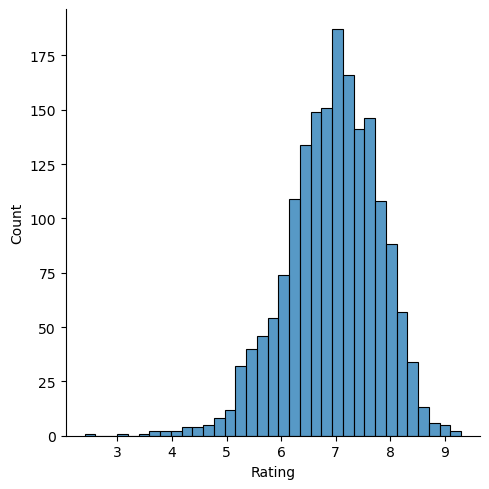

In [22]:
# let's see the Rating distribution
sns.displot(df, x="Rating")

# we can notice that that the distribution is to more right side
# it would be good to cut it until 5 on the x-axis
# in order to make more balanced

In [23]:
# filter out top 8%  (1 - 0.08 = 0.92) based on price to reduce amount of buildings
df = df.query("Rating > Rating.quantile(0.1) and Rating < Rating.quantile(0.95)")

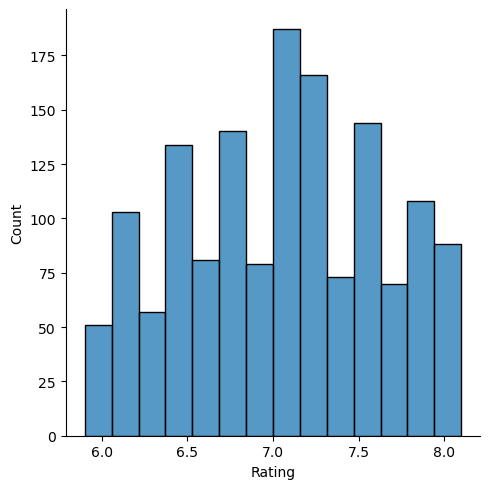

In [24]:
# now data is more balanced
sns.displot(df, x="Rating")

In [25]:
# I checked that I lost about 17% of data because of this outliner removing
df.describe()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
count,1481.000000,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,...,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.0,1481.000000,1481.000000,1481.000000
mean,7.042944,2.616044e+05,63.340986,2006.744767,116.907495,0.330858,0.287643,0.055368,0.063471,0.345037,...,0.003376,0.146523,0.342336,0.004727,0.461175,0.002026,0.0,0.007427,0.001350,0.001350
std,0.578400,2.185316e+05,14.548957,14.542657,20.550997,0.470681,0.452817,0.228774,0.243890,0.475541,...,0.058026,0.353749,0.474652,0.068610,0.498659,0.044977,0.0,0.085891,0.036736,0.036736
min,5.900000,1.410000e+02,16.000000,1938.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.600000,9.900000e+04,52.000000,1999.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,7.100000,2.060000e+05,64.000000,2010.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,7.500000,3.670000e+05,74.000000,2018.000000,128.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,8.100000,1.400000e+06,99.000000,2023.000000,246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


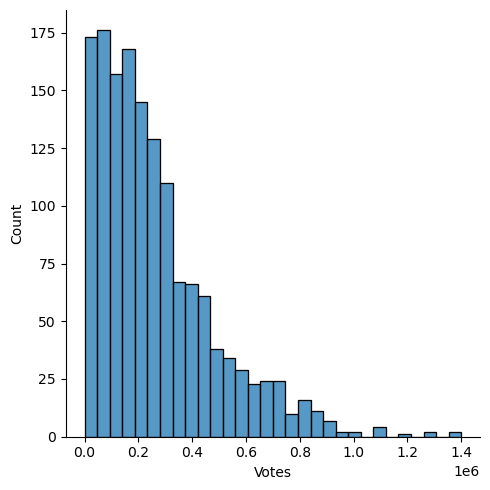

In [26]:
sns.displot(df, x="Votes")
# we can see that the column "Votes" is disbalanced

In [27]:
# let's remove everything that is up than 0.85
df = df.query("Votes < Votes.quantile(0.85)")

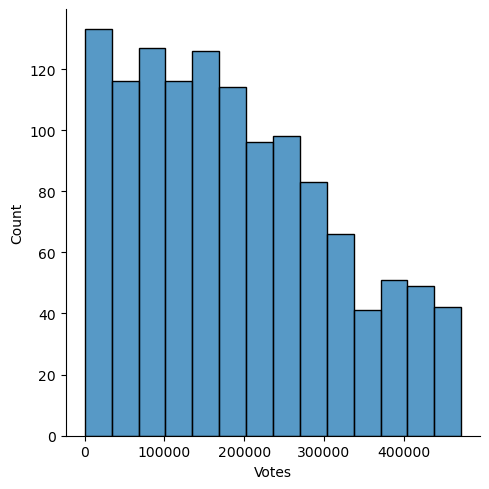

In [28]:
# let's check the data plot
sns.displot(df, x="Votes")

# the daya still in not balanced but 
# we already we removed 15% of data

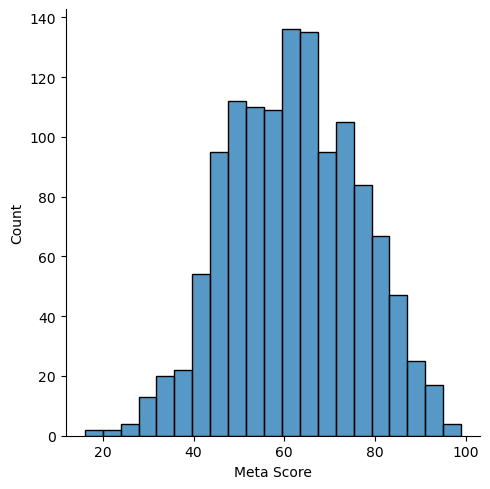

In [29]:
# We still need to carry out of Meta Score, Year, Duration
sns.displot(df, x="Meta Score")

# Meta Score looks pretty well
# I will remove a little bit from bottom

In [30]:
# calculate the cutoff value for the bottom 3%
cutoff_value = df['Meta Score'].quantile(0.03)

# filter out rows where the 'Meta Score' values are below the cutoff
df = df[df['Meta Score'] >= cutoff_value]

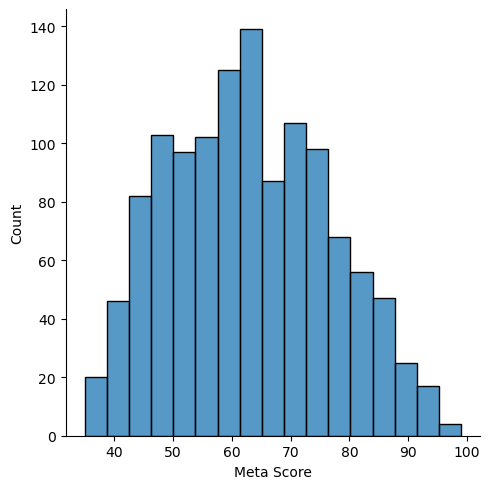

In [31]:
# let's check the plot
sns.displot(df, x="Meta Score")

# it looks pretty balanced

In [32]:
# we can see that there are many outliers in the old movies
class_counts = df['Year'].value_counts()
class_counts

2023    125
2022     79
2019     55
2021     54
2016     42
       ... 
1938      1
1966      1
1942      1
1944      1
1963      1
Name: Year, Length: 73, dtype: int64

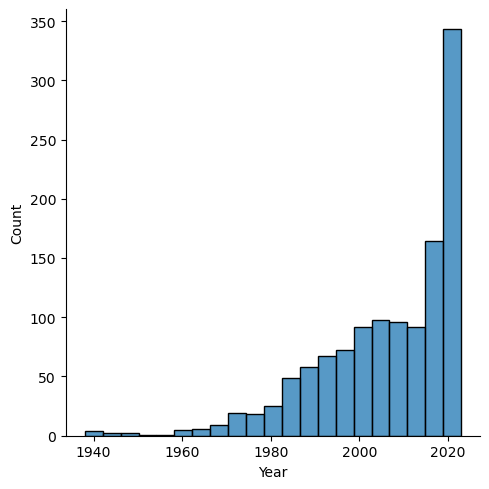

In [33]:
# and also there is a huge number of recent movies
sns.displot(df, x="Year")

In [34]:
# I used quantiles to remove 5% from the bottom
df = df.query('Year >= Year.quantile(q=0.05)')

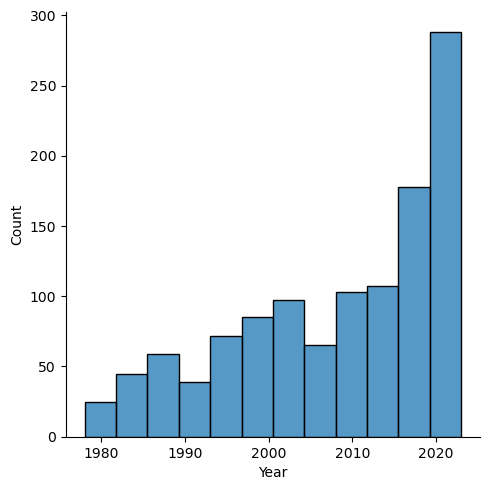

In [35]:
# it is not balanced but we have less outliers
sns.displot(df, x="Year")

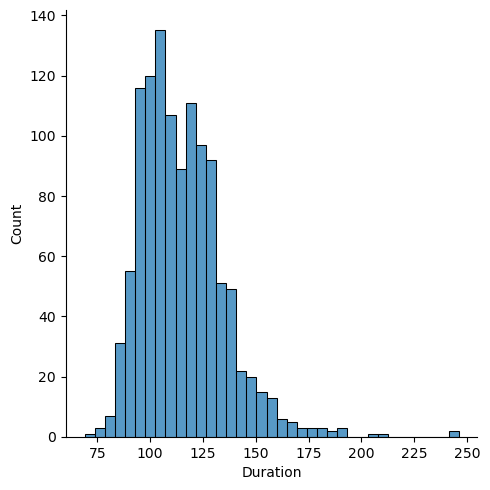

In [36]:
# let's check the last column Duration
sns.displot(df, x="Duration")

In [37]:
# Calculate the cutoff value for the top 3%
cutoff_value = df['Duration'].quantile(0.97)

# Filter out rows where the 'Meta Score' values are above the cutoff
df = df[df['Duration'] <= cutoff_value]

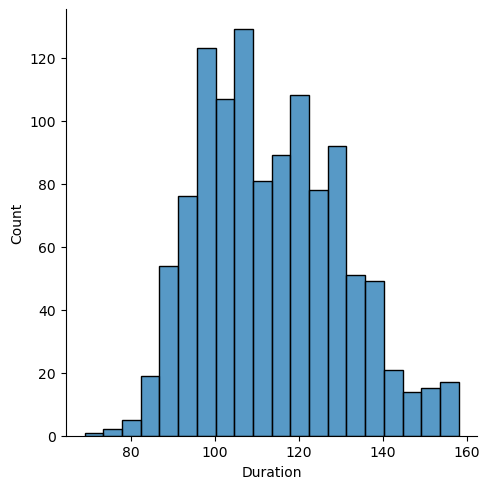

In [38]:
# let's see
sns.displot(df, x="Duration")

# it is an almost perfect balance :)

In [39]:
df.describe()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,...,1131.000000,1131.000000,1131.000000,1131.0,1131.000000,1131.000000,1131.0,1131.000000,1131.000000,1131.000000
mean,6.923431,192291.272325,62.128205,2008.344828,113.503979,0.302387,0.259947,0.058355,0.061892,0.374005,...,0.003537,0.150309,0.319187,0.0,0.494253,0.001768,0.0,0.007958,0.001768,0.001768
std,0.524235,124560.831215,13.304880,12.593070,16.489652,0.459495,0.438799,0.234518,0.241066,0.484079,...,0.059391,0.357533,0.466368,0.0,0.500188,0.042033,0.0,0.088889,0.042033,0.042033
min,5.900000,213.000000,35.000000,1978.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.500000,91000.000000,51.000000,1999.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,6.900000,177000.000000,62.000000,2011.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,7.300000,282000.000000,72.000000,2019.000000,125.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,8.100000,472000.000000,99.000000,2023.000000,158.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [40]:
# calculate the amount of rows in df after cleaning
total_rows_after_cleaning = len(df)

# Calculate the total percentage of data lost across all columns
total_percentage_lost = round(((original_rows - total_rows_after_cleaning) / original_rows) * 100, 3)
print("Total percentage of data lost:", total_percentage_lost)

Total percentage of data lost: 36.603


**The train/test –split**

In [41]:
# print the columns so we can copy the other 
# columns into the X later easily
df.columns

Index(['Rating', 'Votes', 'Meta Score', 'Year', 'Duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'PG Rating_13+', 'PG Rating_16+', 'PG Rating_18+', 'PG Rating_Approved',
       'PG Rating_G', 'PG Rating_GP', 'PG Rating_NC-17', 'PG Rating_PG',
       'PG Rating_PG-13', 'PG Rating_Passed', 'PG Rating_R', 'PG Rating_TV-14',
       'PG Rating_TV-G', 'PG Rating_TV-MA', 'PG Rating_TV-PG',
       'PG Rating_TV-Y7'],
      dtype='object')

In [44]:
# I define X and y -variables
# list here independent variables
X = df[['Votes', 'Meta Score', 'Year', 'Duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'PG Rating_13+', 'PG Rating_16+', 'PG Rating_18+', 'PG Rating_Approved',
       'PG Rating_G', 'PG Rating_GP', 'PG Rating_NC-17', 'PG Rating_PG',
       'PG Rating_PG-13', 'PG Rating_Passed', 'PG Rating_R', 'PG Rating_TV-14',
       'PG Rating_TV-G', 'PG Rating_TV-MA', 'PG Rating_TV-PG',
       'PG Rating_TV-Y7']]


# here we have only the target variable (dependent variable)
y = df['Rating']

In [45]:
# create train and test sets of my dataset
# this examples reserves 20% for test data, 80% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

 **Train our Linear Regression model**

In [46]:
# create an empty linear regression model
# and fit it with out data 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

 **Error and performance metrics**

In [47]:
# make test predictions with new data with our model
predictions = lm.predict(X_test)

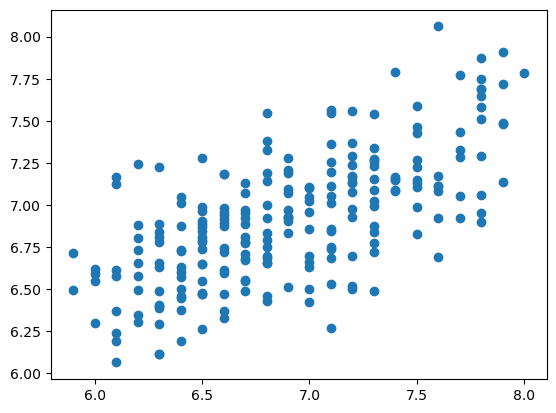

In [48]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
plt.scatter(y_test, predictions)
plt.show()

In [49]:
df.head()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,7.1,56000.0,54.0,2023,157,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,6.6,66000.0,64.0,2023,158,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


** Create a tester row for metrics**

In [50]:
# let's try with some new imaginary data
tester_row = {
    'Votes': 20000, 
    'Meta Score': 54.0, 
    'Year': 2020, 
    'Duration': 117, 
    'Action': 1,'Adventure': 1, 'Animation': 1, 'Biography': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0,
       'Drama': 0, 'Family': 0, 'Fantasy': 0, 'History': 0, 'Horror': 0, 'Music': 0, 'Musical': 0,
       'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, 'Sport': 0, 'Thriller': 0, 'War': 0, 'Western': 0,
       
    'PG Rating_13+': 1, 'PG Rating_16+': 0, 'PG Rating_18+': 0, 'PG Rating_Approved': 0,
       'PG Rating_G': 0, 'PG Rating_GP': 0, 'PG Rating_NC-17': 0, 'PG Rating_PG': 0,
       'PG Rating_PG-13': 0, 'PG Rating_Passed': 0, 'PG Rating_R': 0, 'PG Rating_TV-14': 0,
       'PG Rating_TV-G': 0, 'PG Rating_TV-MA': 0, 'PG Rating_TV-PG': 0,
       'PG Rating_TV-Y7': 0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [51]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted rating for this movie:: {round(float(result), 2)}")


Predicted rating for this movie:: 6.79


In [52]:
# Lower values indicate better performance - MAE, MSE, RMSE
# R-squared: 1 is perfect, 0 is worst outcome

# MAE - Mean average error
# The average of all errors
# Simple, but doesn't take large errors into account that much
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2))

# MSE - Mean square error
# Errors are computed in the power of 2 (squared) => larger mistakes are emphasized
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "^2")

# RMSE - Root mean square error
# the most common error metric used in regression
# 0 = perfect RMSE-score, 1 = worst possible RMSE-score
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.3

MSE
0.15

RMSE:
0.38

R-squared:
0.44


/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_46184/3920156057.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


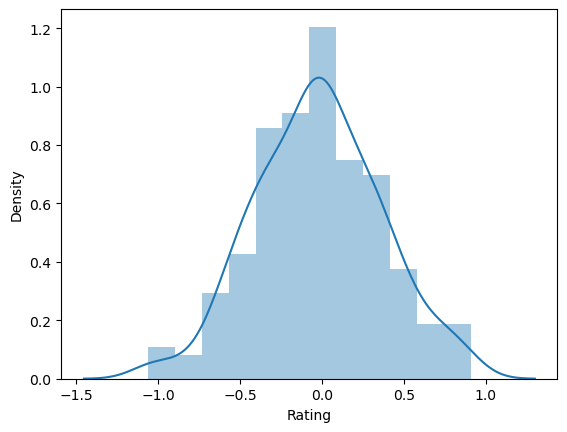

In [53]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

# we can see that there is a normal distribution 

**Emphasizing variables that should affect the prediction greatly**

In [62]:
# installation of needed libraries
pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 7.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 8.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 7.2 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.0/873.0 kB 5.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=84cc93e677ea2363a2bda9b6d56ef59f

In [63]:
# instal the needed module
import dtale

In [66]:
# let's inspect correlation matrix with dtale
# 1 = a perfect positive correlation
# -1 = a negative correlation
# 0 = no linear correlation between the variables
dtale.show(df)

# for more convienient usage there is an option in the right corner
# to open in a new tab after choosing "Correlations" in the Vizualizse button

# we can see that the table shows correlation between
# Rating - Meta Score = 0.53
# Rating - Votes = 0.37

# and there are some surprises, f.e.,
# Rating - Year = -0.28
# and also Duration does not plau a significant role
# considering this dtale table
# Rating - Duration = 0.18

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning:

invalid value encountered in divide

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning:

invalid value encountered in divide

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning:

invalid value encountered in divide



In [67]:
# By this dtale table I found that some columns 
# such as PG Rating_16+, PG Rating_18+, PG Rating_Approve and etc 
# have N/A values
# first of all, I though that maybe they contain NaN values
# I checked it
nan_values = df.isna().sum()
nan_values

# no, all NaN are removed

Rating                0
Votes                 0
Meta Score            0
Year                  0
Duration              0
Action                0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
PG Rating_13+         0
PG Rating_16+         0
PG Rating_18+         0
PG Rating_Approved    0
PG Rating_G           0
PG Rating_GP          0
PG Rating_NC-17       0
PG Rating_PG          0
PG Rating_PG-13       0
PG Rating_Passed      0
PG Rating_R           0
PG Rating_TV-14       0
PG Rating_TV-G        0
PG Rating_TV-MA       0
PG Rating_TV-PG       0
PG Rating_TV-Y7 

In [68]:
# I assumed that it simply possible that these columns 
# have all zeros
# In this case the correlation coefficient cannot be computed 
# because the standard deviation of that variable is zero


# check if all values in a column are zeros
def check_column_only_zeros(column):
    return (column == 0).all()

# Check each column for only zeros
for column in df.columns:
    if check_column_only_zeros(df[column]):
        print(f"Column '{column}' contains only zeros.")

Column 'PG Rating_16+' contains only zeros.
Column 'PG Rating_18+' contains only zeros.
Column 'PG Rating_Approved' contains only zeros.
Column 'PG Rating_GP' contains only zeros.
Column 'PG Rating_Passed' contains only zeros.
Column 'PG Rating_TV-G' contains only zeros.


In [ ]:
# I can drop these columns
df = df.drop(columns=['PG Rating_16+', 'PG Rating_18+', 'PG Rating_Approved', 'Moive', 'Moive', 'Moive', 'Moive'])

In [43]:
#to be continued...